In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
# Load the dataset
data = pd.read_csv("VerbAgg.csv")

In [7]:
data

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
0,1,20,M,S1WantCurse,no,1,curse,other,want,N
1,2,11,M,S1WantCurse,no,2,curse,other,want,N
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y
...,...,...,...,...,...,...,...,...,...,...
7579,7580,17,M,S4DoShout,no,312,shout,self,do,N
7580,7581,20,F,S4DoShout,no,313,shout,self,do,N
7581,7582,25,F,S4DoShout,no,314,shout,self,do,N
7582,7583,23,F,S4DoShout,no,315,shout,self,do,N


In [5]:
# Task 1: Data Deduplication
deduplicated_data = data.drop_duplicates()

In [6]:
deduplicated_data

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
0,1,20,M,S1WantCurse,no,1,curse,other,want,N
1,2,11,M,S1WantCurse,no,2,curse,other,want,N
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y
...,...,...,...,...,...,...,...,...,...,...
7579,7580,17,M,S4DoShout,no,312,shout,self,do,N
7580,7581,20,F,S4DoShout,no,313,shout,self,do,N
7581,7582,25,F,S4DoShout,no,314,shout,self,do,N
7582,7583,23,F,S4DoShout,no,315,shout,self,do,N


In [8]:
# Task 2: Value Replacement - Replace all occurrences of a specific value (e.g., replace -1 with NaN)
value_replaced_data = deduplicated_data.replace(-1, np.nan)

In [9]:
# Task 3: Discretization and Binning - Apply binning to a numerical column (e.g., the first numerical column found)
# Assume the column to bin is numeric. If no numeric column exists, we log and leave the task.
numeric_cols = value_replaced_data.select_dtypes(include=['float64', 'int64']).columns
if not numeric_cols.empty:
    column_to_bin = numeric_cols[0]
    binned_data = value_replaced_data.copy()
    binned_data[f"{column_to_bin}_binned"] = pd.cut(
        binned_data[column_to_bin],
        bins=3,  # Dividing into 3 bins
        labels=["Low", "Medium", "High"]
    )
else:
    binned_data = value_replaced_data
    binned_data["Binning_Error"] = "No numeric column found for binning"


In [10]:
binned_data

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2,rownames_binned
0,1,20,M,S1WantCurse,no,1,curse,other,want,N,Low
1,2,11,M,S1WantCurse,no,2,curse,other,want,N,Low
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y,Low
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y,Low
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y,Low
...,...,...,...,...,...,...,...,...,...,...,...
7579,7580,17,M,S4DoShout,no,312,shout,self,do,N,High
7580,7581,20,F,S4DoShout,no,313,shout,self,do,N,High
7581,7582,25,F,S4DoShout,no,314,shout,self,do,N,High
7582,7583,23,F,S4DoShout,no,315,shout,self,do,N,High


In [11]:
# Task 4: Handling Missing Data
# a. Traditional Method: Impute with mean
imputer_mean = SimpleImputer(strategy='mean')
mean_imputed_data = binned_data.copy()
mean_imputed_data[numeric_cols] = imputer_mean.fit_transform(mean_imputed_data[numeric_cols])

In [12]:
results = {
    "Deduplicated_Data": deduplicated_data,
    "Value_Replaced_Data": value_replaced_data,
    "Binned_Data": binned_data,
    "Mean_Imputed_Data": mean_imputed_data,
}

In [15]:
results['Deduplicated_Data']

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
0,1,20,M,S1WantCurse,no,1,curse,other,want,N
1,2,11,M,S1WantCurse,no,2,curse,other,want,N
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y
...,...,...,...,...,...,...,...,...,...,...
7579,7580,17,M,S4DoShout,no,312,shout,self,do,N
7580,7581,20,F,S4DoShout,no,313,shout,self,do,N
7581,7582,25,F,S4DoShout,no,314,shout,self,do,N
7582,7583,23,F,S4DoShout,no,315,shout,self,do,N


In [16]:
results['Value_Replaced_Data']

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
0,1,20,M,S1WantCurse,no,1,curse,other,want,N
1,2,11,M,S1WantCurse,no,2,curse,other,want,N
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y
...,...,...,...,...,...,...,...,...,...,...
7579,7580,17,M,S4DoShout,no,312,shout,self,do,N
7580,7581,20,F,S4DoShout,no,313,shout,self,do,N
7581,7582,25,F,S4DoShout,no,314,shout,self,do,N
7582,7583,23,F,S4DoShout,no,315,shout,self,do,N


In [17]:
results['Binned_Data']

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2,rownames_binned
0,1,20,M,S1WantCurse,no,1,curse,other,want,N,Low
1,2,11,M,S1WantCurse,no,2,curse,other,want,N,Low
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y,Low
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y,Low
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y,Low
...,...,...,...,...,...,...,...,...,...,...,...
7579,7580,17,M,S4DoShout,no,312,shout,self,do,N,High
7580,7581,20,F,S4DoShout,no,313,shout,self,do,N,High
7581,7582,25,F,S4DoShout,no,314,shout,self,do,N,High
7582,7583,23,F,S4DoShout,no,315,shout,self,do,N,High


In [18]:
results['Mean_Imputed_Data']

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2,rownames_binned
0,1.0,20.0,M,S1WantCurse,no,1.0,curse,other,want,N,Low
1,2.0,11.0,M,S1WantCurse,no,2.0,curse,other,want,N,Low
2,3.0,17.0,F,S1WantCurse,perhaps,3.0,curse,other,want,Y,Low
3,4.0,21.0,F,S1WantCurse,perhaps,4.0,curse,other,want,Y,Low
4,5.0,17.0,F,S1WantCurse,perhaps,5.0,curse,other,want,Y,Low
...,...,...,...,...,...,...,...,...,...,...,...
7579,7580.0,17.0,M,S4DoShout,no,312.0,shout,self,do,N,High
7580,7581.0,20.0,F,S4DoShout,no,313.0,shout,self,do,N,High
7581,7582.0,25.0,F,S4DoShout,no,314.0,shout,self,do,N,High
7582,7583.0,23.0,F,S4DoShout,no,315.0,shout,self,do,N,High


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Task 1: Statistical Summary Measures
stat_summary = data.describe()
stat_summary

,rownames,Anger,id
count,7584.000000,7584.000000,7584.0000
mean,3792.500000,20.003165,158.5000
std,2189.456554,4.841139,91.2269
min,1.000000,11.000000,1.0000
25%,1896.750000,17.000000,79.7500
50%,3792.500000,19.000000,158.5000
75%,5688.250000,23.000000,237.2500
max,7584.000000,39.000000,316.0000


In [24]:
# Task 2: Data Elaboration - Checking unique values and correlations
unique_counts = data.nunique()
correlation_matrix = data.corr(numeric_only=True)

In [25]:
unique_counts

rownames    7584
Anger         26
Gender         2
item          24
resp           3
id           316
btype          3
situ           2
mode           2
r2             2
dtype: int64

In [26]:
correlation_matrix

,rownames,Anger,id
rownames,1.000000,-0.002113,0.041666
Anger,-0.002113,1.000000,-0.050706
id,0.041666,-0.050706,1.000000


C:\Users\NadiadAdmin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


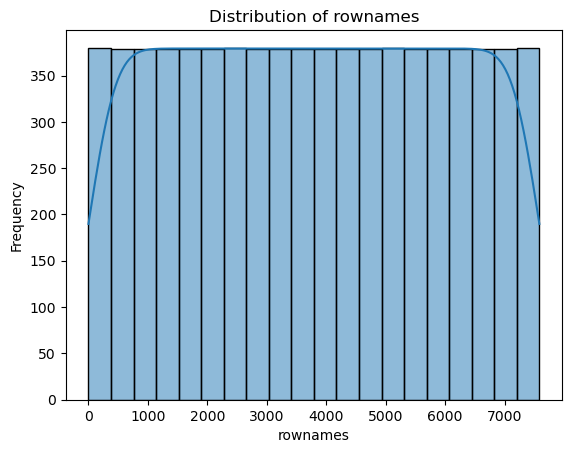

In [32]:
# Task 3: 1-D Statistical Analysis - Distribution of a numeric column
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
column_to_analyze = numeric_cols[0]
plt.figure()
sns.histplot(data[column_to_analyze], kde=True)
plt.title(f"Distribution of {column_to_analyze}")
plt.xlabel(column_to_analyze)
plt.ylabel("Frequency")
plt.show()


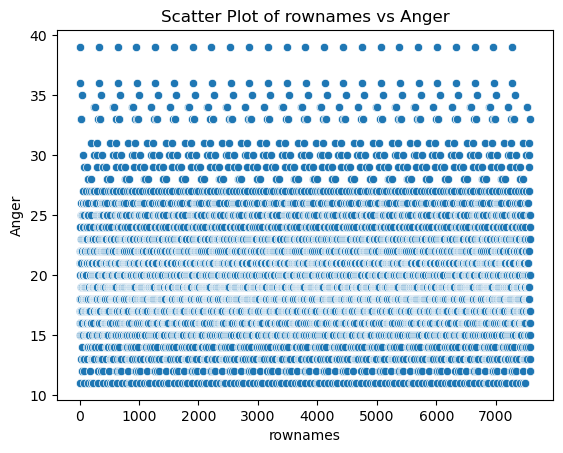

In [31]:
# Task 4: 2-D Statistical Analysis - Scatter plot of two numeric columns
plt.figure()
sns.scatterplot(x=data[numeric_cols[0]], y=data[numeric_cols[1]])
plt.title(f"Scatter Plot of {numeric_cols[0]} vs {numeric_cols[1]}")
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.show()

In [34]:
# Task 5: Contingency Tables
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
contingency_table = pd.crosstab(data[categorical_cols[0]], data[categorical_cols[1]])
contingency_table

item,S1DoCurse,S1DoScold,S1DoShout,S1WantCurse,S1WantScold,S1WantShout,S2DoCurse,S2DoScold,S2DoShout,S2WantCurse,...,S3DoShout,S3WantCurse,S3WantScold,S3WantShout,S4DoCurse,S4DoScold,S4DoShout,S4WantScold,S4WantShout,S4wantCurse
Gender,,,,,,,,,,,,,,,,,,,,,
F,243,243,243,243,243,243,243,243,243,243,...,243,243,243,243,243,243,243,243,243,243
M,73,73,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73


C:\Users\NadiadAdmin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NadiadAdmin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NadiadAdmin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


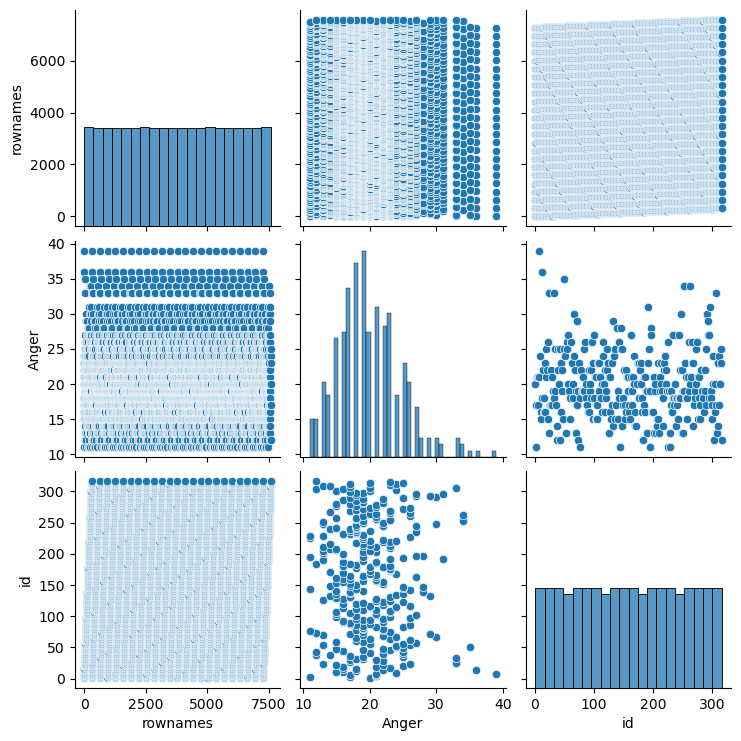

In [36]:
# Task 6: n-D Statistical Analysis - Pair plot for numeric data
sns.pairplot(data[numeric_cols])
plt.show()

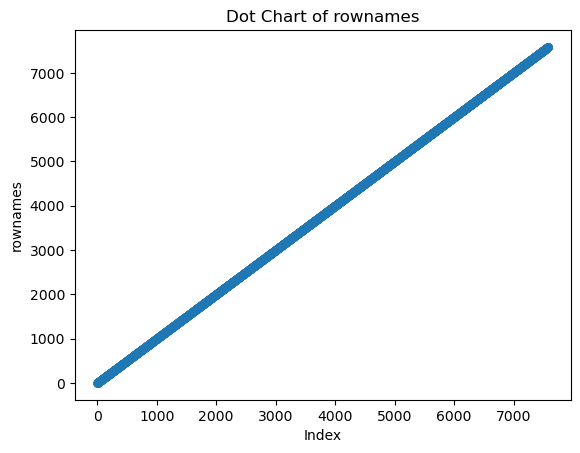

In [37]:
# Task 7: Visualization - Dot charts and Bar plots
plt.figure()
plt.plot(data[numeric_cols[0]], marker='o', linestyle='None', markersize=5)
plt.title(f"Dot Chart of {numeric_cols[0]}")
plt.xlabel("Index")
plt.ylabel(numeric_cols[0])
plt.show()

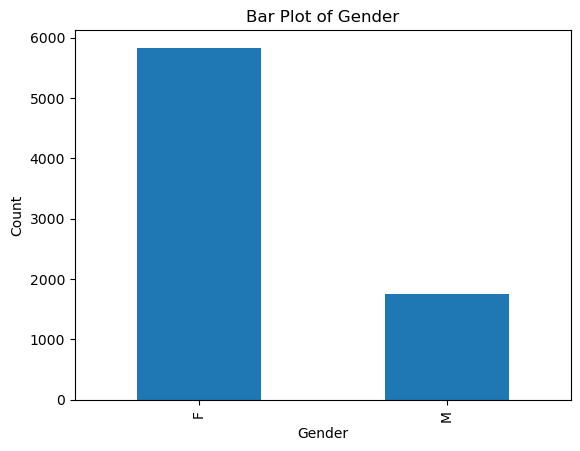

In [38]:
# Bar plot for categorical data
plt.figure()
data[categorical_cols[0]].value_counts().plot(kind='bar')
plt.title(f"Bar Plot of {categorical_cols[0]}")
plt.xlabel(categorical_cols[0])
plt.ylabel("Count")
plt.show()

In [56]:
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage,dendrogram

In [46]:
# Preprocess data: Standardizing numerical columns for clustering
numeric_data = data.select_dtypes(include=['float64', 'int64']).dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [48]:
# Task 1: Minimum Spanning Tree Clustering
# Compute the distance matrix (square matrix)
distance_matrix = squareform(pdist(scaled_data, metric='euclidean'))
# Compute the Minimum Spanning Tree
mst = minimum_spanning_tree(distance_matrix)
# Convert the result to a dense array for analysis
mst_data = mst.toarray()
mst_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

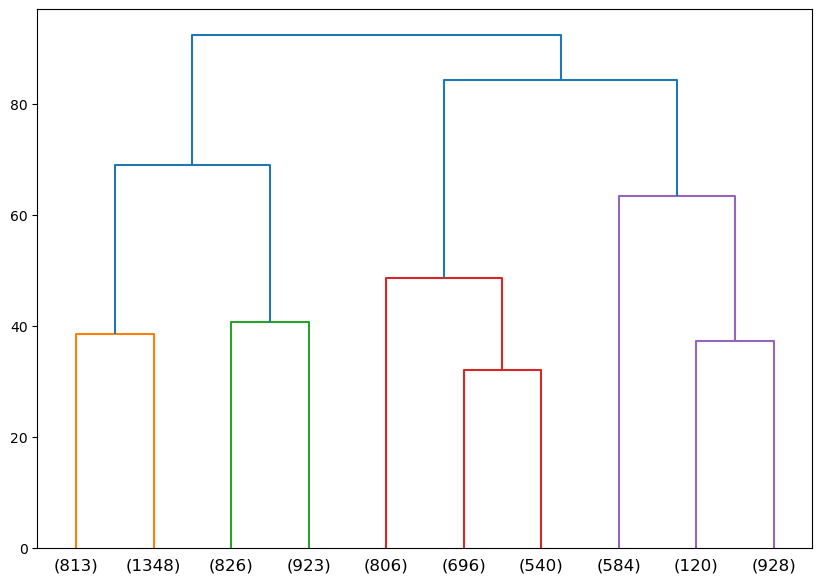

In [57]:
linkage_matrix=linkage(scaled_data,method='ward')
plt.figure(figsize=(10,7))
dendrogram(linkage_matrix,truncate_mode='lastp',p=10)
plt.show()

In [50]:
# Task 2: Hierarchical Agglomerative Model-Based Clustering
agglo_model = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo_model.fit_predict(scaled_data)

In [51]:
agglo_labels

array([0, 0, 0, ..., 1, 1, 2], dtype=int64)

In [52]:
# Task 3: Outlier Detection using Clustering
lof = LocalOutlierFactor(n_neighbors=20)
outlier_labels = lof.fit_predict(scaled_data)
outliers = numeric_data[outlier_labels == -1]

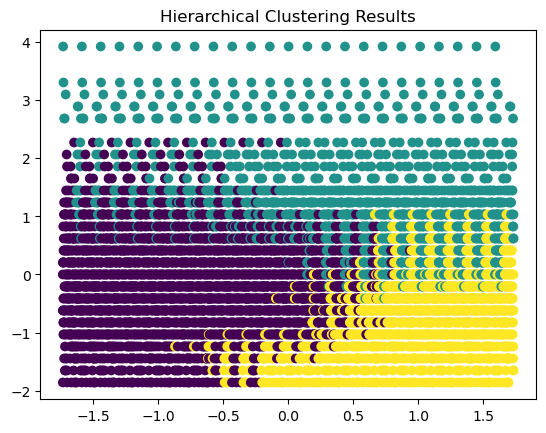

In [53]:
# Scatter plot for Hierarchical Clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agglo_labels, cmap='viridis')
plt.title("Hierarchical Clustering Results")
plt.show()

In [60]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import MDS, Isomap
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
import matplotlib.pyplot as plt

In [61]:
# Task 1: Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # Reducing to 2 components
pca_result = pca.fit_transform(scaled_data)

In [62]:
# Task 2: Singular Value Decomposition (SVD)
# Using PCA to simulate SVD, as PCA performs SVD internally
svd_components = pca.components_

In [63]:
# Task 3: Factor Analysis
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
factor_result = factor_analysis.fit_transform(scaled_data)

In [66]:
# Task 4: Self-Organizing Maps (SOM)
som = MiniSom(x=5, y=5, input_len=scaled_data.shape[1], sigma=0.5, learning_rate=0.5)
som.random_weights_init(scaled_data)
som.train_random(scaled_data, 100)  # Train SOM with 100 iterations

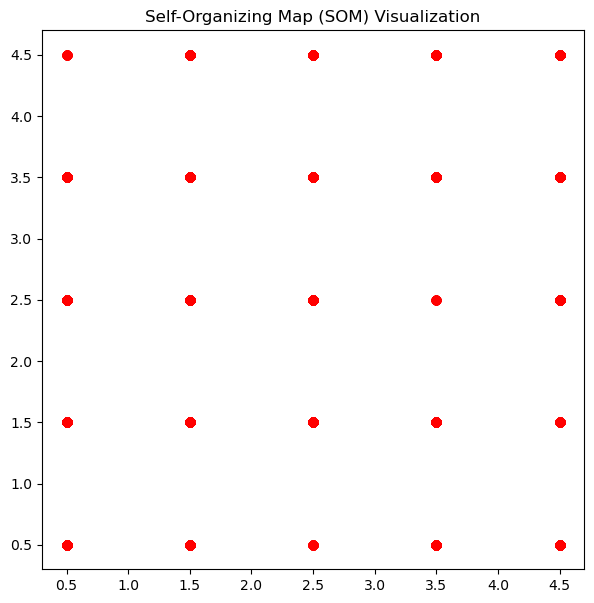

In [67]:
# Visualizing SOM
plt.figure(figsize=(7, 7))
for i, x in enumerate(scaled_data):
    w = som.winner(x)  # Get winning neuron
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', color='red')  # Plot neuron activation
plt.title("Self-Organizing Map (SOM) Visualization")
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
numeric_data = data.select_dtypes(include=['float64', 'int64']).dropna()


In [71]:
# Select features (X) and target (y) - using the first two numeric columns for demonstration
X = numeric_data.iloc[:, :-1]  # All columns except the last one
y = numeric_data.iloc[:, -1]   # Last column as target


In [72]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# Construct Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [74]:
# Predictions
y_pred = linear_model.predict(X_test)


In [75]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [78]:
# Save metrics
metrics = {
    "Mean Squared Error": mse,
    "R2 Score": r2
}

In [79]:
# Print metrics
print("Linear Regression Evaluation Metrics:")
print(metrics)

Linear Regression Evaluation Metrics:
{'Mean Squared Error': 8311.684112448542, 'R2 Score': 0.0006997028571616992}
